# Read data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/MyDrive/boston_airbnb/'
listings_path = folder_path + 'listings.csv'
calendar_path = folder_path + 'calendar.csv'
reviews_path = folder_path + 'reviews.csv'
boston_geojson = folder_path + 'Boston_Neighborhoods.geojson'

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.3 MB/s 
     |████████████████████████████████| 16.7 MB 32.1 MB/s 
     |████████████████████████████████| 6.3 MB 21.9 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gp
from shapely.geometry import Point
import matplotlib.pyplot as plt

# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

In [ ]:
listings_df = pd.read_csv(listings_path)
calendar_df = pd.read_csv(calendar_path)
reviews_df = pd.read_csv(reviews_path)

# Clean, slice and transform Listings

In [ ]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [ ]:
# correct the data type
listings_df = listings_df.astype({'id': str})

# clean price column
listings_df.loc[:, 'price'] = listings_df['price'].str.replace('\$|,', '', regex=True).astype('float')

# preprocess for coordinates
listings_df.loc[:, 'coords'] = list(zip(listings_df['longitude'], listings_df['latitude']))
listings_df.loc[:, 'coords'] = listings_df['coords'].apply(Point)

listing_loc = listings_df.loc[:, ['id', 'coords','price']]
listing_loc = gp.GeoDataFrame(listing_loc, geometry='coords')

In [ ]:
listing_loc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      3585 non-null   object  
 1   coords  3585 non-null   geometry
 2   price   3585 non-null   float64 
dtypes: float64(1), geometry(1), object(1)
memory usage: 84.1+ KB


# Clean, slice and transform Calendar 

In [ ]:
calendar_df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [ ]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [ ]:
calendar_df = calendar_df.drop_duplicates()

calendar_df.loc[:, 'price'] = calendar_df['price'].str.replace('\$|,', '', regex=True).astype('float')
calendar_df.loc[:, 'occupied'] = calendar_df['available'].apply(lambda x: 1 if x == 'f' else 0)
calendar_df.loc[:, 'date'] = pd.to_datetime(calendar_df['date'])

correct_type = {
    'listing_id': str,
    'price': float
}
calendar_df = calendar_df.astype(correct_type)

In [ ]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308525 entries, 0 to 1308889
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308525 non-null  object        
 1   date        1308525 non-null  datetime64[ns]
 2   available   1308525 non-null  object        
 3   price       642957 non-null   float64       
 4   occupied    1308525 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 59.9+ MB


# First question: How is the price distributed in different areas?

In [ ]:
# Identify and remove listings whose stats values higher than others to make sure all the listings treated fairly.
calendar_df.groupby('listing_id')['occupied'].count().sort_values()

listing_id
10004575    365
5628808     365
5639731     365
5640375     365
5649821     365
           ... 
14168664    365
14178758    365
14186170    365
2657905     365
9999894     365
Name: occupied, Length: 3585, dtype: int64

In [ ]:
listing_avail_ratio = calendar_df.groupby('listing_id')[['occupied']].mean()
listing_avail_ratio.reset_index(inplace=True)

In [ ]:
listing_loc.shape

(3585, 3)

In [ ]:
listing_avail_ratio.shape

(3585, 2)

In [ ]:
listing_avail_ratio.head()

,listing_id,occupied
0,10004575,0.753425
1,10009367,1.000000
2,10021398,0.101370
3,10032327,0.794521
4,10033322,0.509589


In [ ]:
df = pd.merge(listing_loc, listing_avail_ratio, left_on=['id'], right_on=['listing_id'], how='inner').drop(columns=['id'])
df = df.reindex(columns=['listing_id', 'coords', 'occupied', 'price'])

In [ ]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   listing_id  3585 non-null   object  
 1   coords      3585 non-null   geometry
 2   occupied    3585 non-null   float64 
 3   price       3585 non-null   float64 
dtypes: float64(2), geometry(1), object(1)
memory usage: 140.0+ KB


In [ ]:
# prepare geodata for plotting
gdf = df
geojs = gp.read_file(boston_geojson)

def geoplot_custom(df, column_to_represent, geo_js_df, title,
                   legend_label='Legend', legend=True, markersize=10, figsize=(15, 15), ax=None, cmap='plasma'):
  base = geo_js_df.plot(color='white', edgecolor='black', linewidth=1, figsize=figsize, ax=ax)
  df.plot(
      ax=base,
      marker='o',
      column=column_to_represent,
      cmap=cmap,
      markersize=markersize,
      legend=legend,
      legend_kwds={'label': legend_label,
                'orientation': "horizontal"}
  )
  if ax:
    ax.title.set_text(title)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
  else:
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(title)


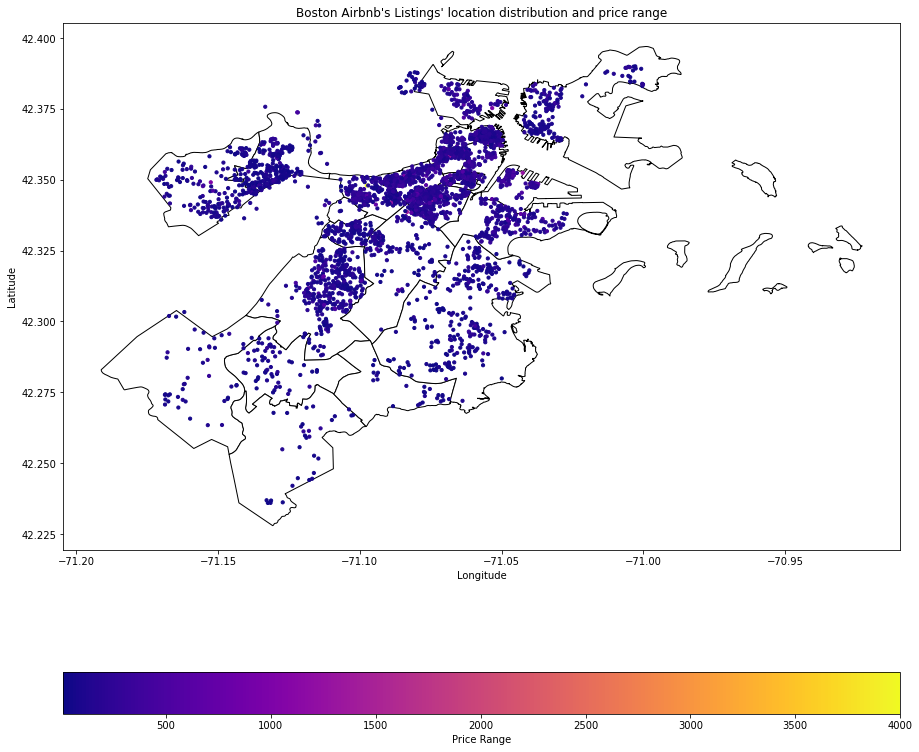

In [ ]:
geoplot_custom(
    gdf,
    'price',
    geojs,
    "Boston Airbnb's Listings' location distribution and price range",
    legend_label='Price Range'
)
plt.savefig('pic0.jpg', dpi=300)

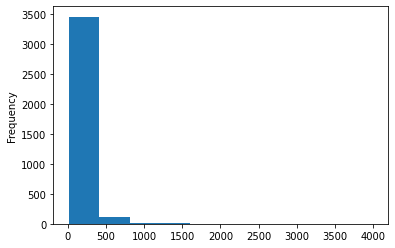

In [ ]:
gdf['price'].plot(kind='hist')

In [ ]:
print(gdf[gdf.price <= 1000].shape)
print(gdf[gdf.price > 1000].shape)

(3575, 4)
(10, 4)


In [ ]:
print(max(calendar_df.date))
print(min(calendar_df.date))

2017-09-05 00:00:00
2016-09-06 00:00:00


In [ ]:
small = gdf[gdf.price <= 1000]

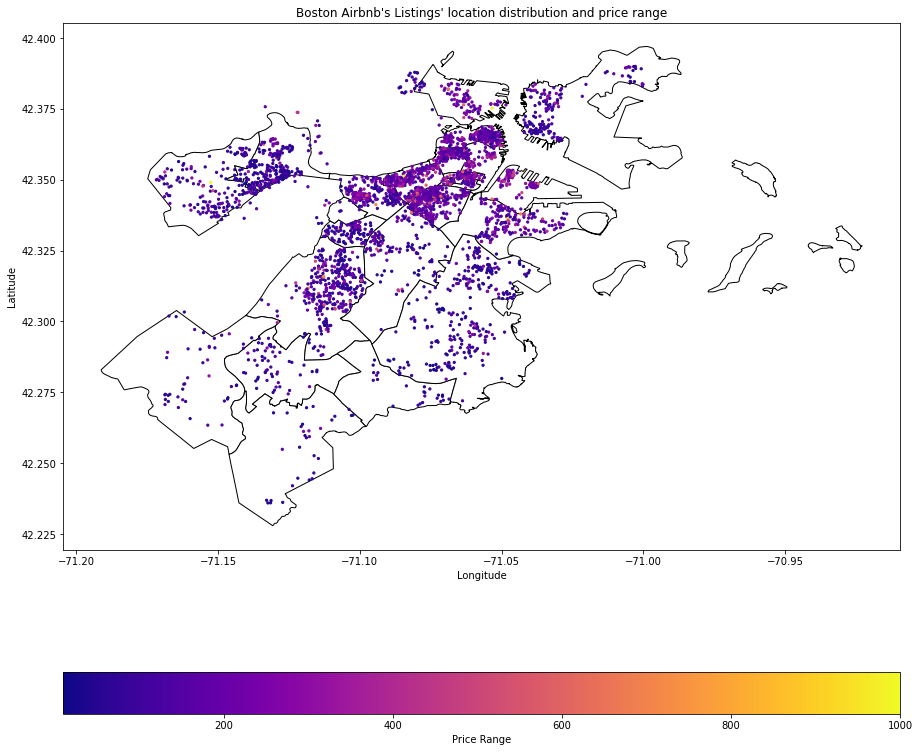

In [ ]:
geoplot_custom(
    small,
    'price',
    geojs,
    "Boston Airbnb's Listings' location distribution and price range",
    markersize=5,
    legend_label='Price Range'
)

plt.savefig('pic1.jpg', dpi=300)

# Second questions: How are rooms occupied and their distribution over a year?

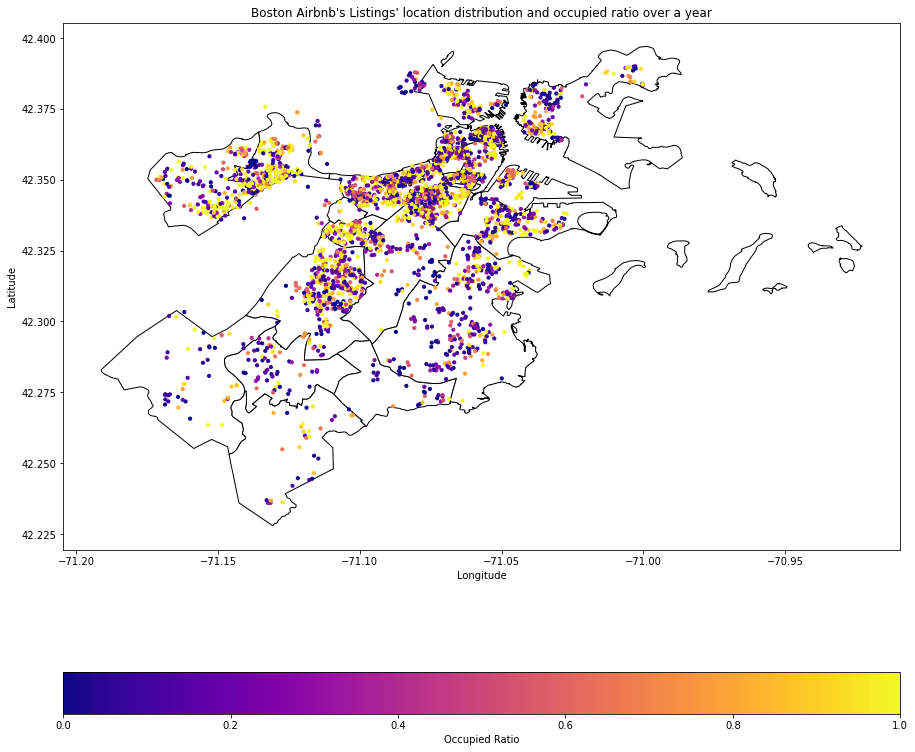

In [ ]:
geoplot_custom(
    gdf,
    'occupied',
    geojs,
    "Boston Airbnb's Listings' location distribution and occupied ratio over a year",
    legend_label='Occupied Ratio'
)

plt.savefig('pic2.jpg', dpi=300)

# Question 3: How are rooms occupied by season and distributed on the map

In [ ]:
# reference from https://stackoverflow.com/questions/60285557/extract-seasons-from-datetime-pandas#60285720
date_offset = (calendar_df.date.dt.month*100 + calendar_df.date.dt.day - 320)%1300
season_series = pd.cut(date_offset, [0, 300, 602, 900, 1300],
                      labels=['spring', 'summer', 'autumn', 'winter'], ordered=False).str.strip().rename('season')

new_calendar_df = pd.concat([calendar_df, season_series], axis=1)

In [ ]:
new_calendar_df.head()

,listing_id,date,available,price,occupied,season
0,12147973,2017-09-05,f,NaN,1,summer
1,12147973,2017-09-04,f,NaN,1,summer
2,12147973,2017-09-03,f,NaN,1,summer
3,12147973,2017-09-02,f,NaN,1,summer
4,12147973,2017-09-01,f,NaN,1,summer


In [ ]:
# filter by season to create new four df, and group by !
all_seasons = ['spring', 'summer', 'autumn', 'winter']
gdf_season = []

for i_season in all_seasons:
  # filter by season
  filtered_df = new_calendar_df[new_calendar_df.season == i_season]
  
  # caculate occupied ratio
  filtered_df = filtered_df.groupby('listing_id')[['occupied']].mean()
  filtered_df.reset_index(inplace=True)

  # add location info
  temp_df = pd.merge(listing_loc, filtered_df, left_on=['id'], right_on=['listing_id'], how='inner').drop(columns=['id'])
  temp_df = temp_df.reindex(columns=['listing_id', 'coords', 'occupied', 'price'])

  gdf_season.append(temp_df)

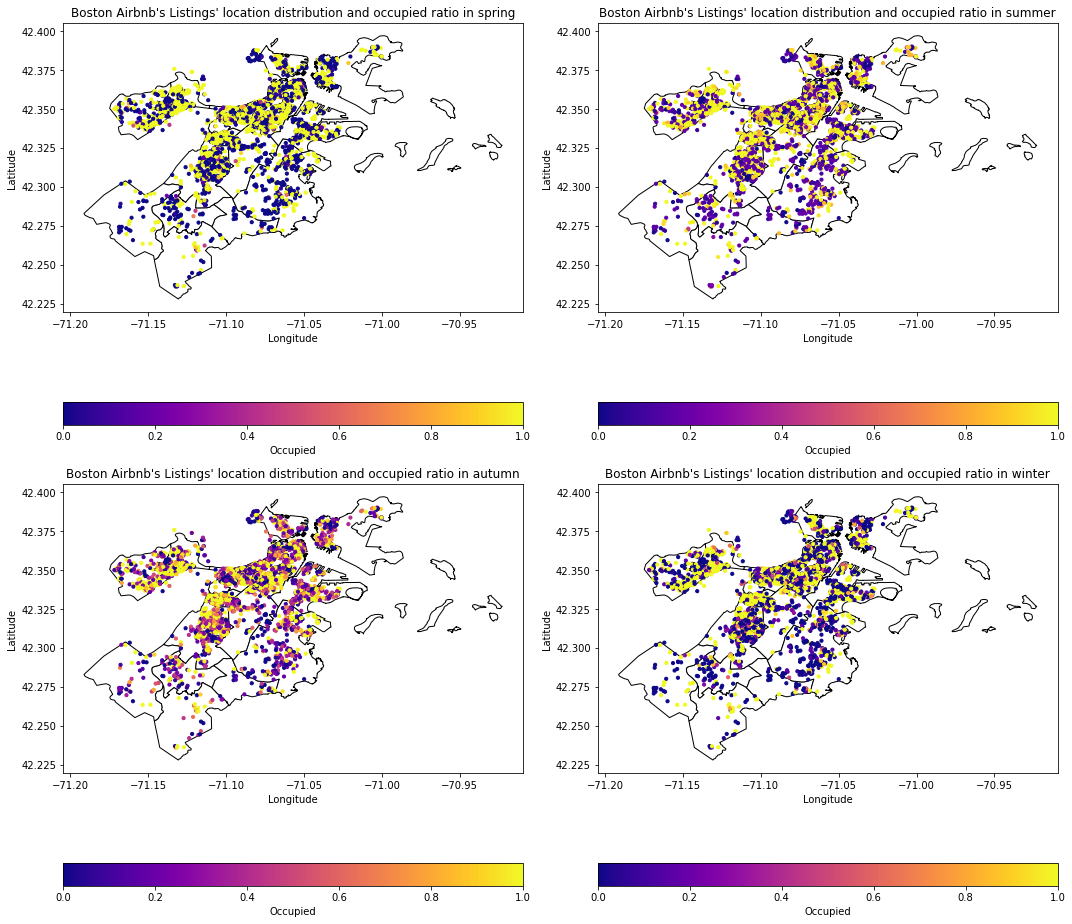

In [ ]:
figure, axis = plt.subplots(2,2, figsize=(15, 15), tight_layout=True)

for i, val in enumerate(all_seasons):
  geoplot_custom(
      gdf_season[i],
      'occupied',
      geojs,
      "Boston Airbnb's Listings' location distribution and occupied ratio in {}".format(val),
      legend_label='Occupied',
      ax=axis[i // 2, i % 2]
  )

plt.savefig('pic3.jpg', dpi=300)